**We'll explore data to understand and extract as much information possible about details related to the Games in the Steam Data Set.**

Loading modules:
----------------

In [3]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns

Preparing DataFrame:
--------------------

In [4]:
df = pd.read_csv("../input/steam-200k.csv", header=None, index_col=None, names=['UserID', 'Game', 'Action', 'Hours', 'Other'])
df = df[df['Hours'] != 1]
del df['Other']
del df['Action']
df.head()

,UserID,Game,Hours
1,151603712,The Elder Scrolls V Skyrim,273.0
3,151603712,Fallout 4,87.0
5,151603712,Spore,14.9
7,151603712,Fallout New Vegas,12.1
9,151603712,Left 4 Dead 2,8.9


Top 20 Games Based on Hours and Users:
--------------------------------------

*Preparing data for plotting*

In [5]:
Top20_hours = df.groupby("Game").Hours.aggregate('sum').sort_values(ascending=False)[:20]
Top20_Users = df.groupby("Game").UserID.aggregate('sum').sort_values(ascending=False)[:20]
Top20_hours.values

#Making a DataFrame: please comment if there's a better way tto do this. I am new to python.
Top20_hours1 = pd.DataFrame(data=Top20_hours.index, columns=['Game'])
Top20_hours2 = pd.DataFrame(data=Top20_hours.values, columns=['Hours'])
Top20_hours = pd.merge(Top20_hours1, Top20_hours2, left_index=True, right_index=True)

Top20_Users1 = pd.DataFrame(data=Top20_Users.index, columns=['Game'])
Top20_Users2 = pd.DataFrame(data=Top20_Users.values, columns=['Users'])
Top20_Users = pd.merge(Top20_Users1, Top20_Users2, left_index=True, right_index=True)

*Plotting the Top 20's Hours Wise*

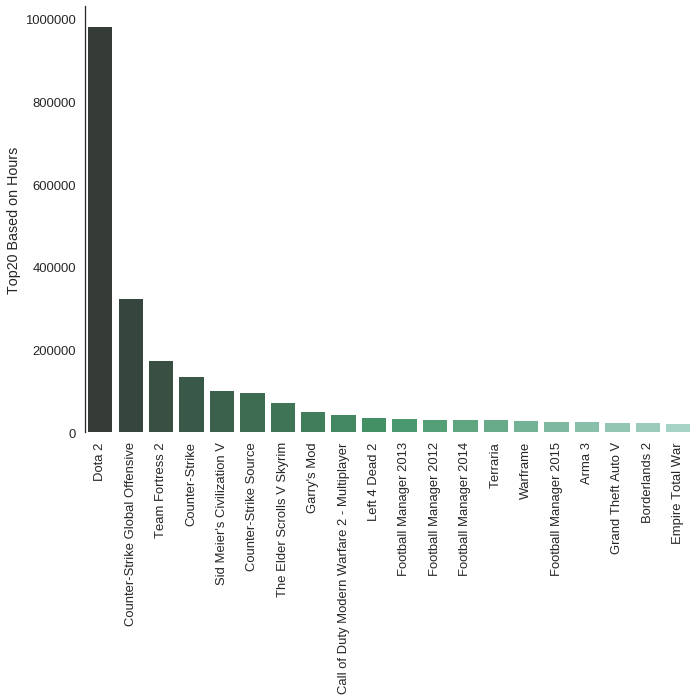

In [6]:
sns.set(style="white", context="talk")
fig1, ax1 = plt.subplots(figsize=(10, 10), sharex=True)  # Set up the matplotlib figure
x1 = np.array(list(Top20_hours['Game']))
y1 = np.array(list(Top20_hours['Hours']))
sns.barplot(x1, y1, palette="BuGn_d", ax=ax1)
ax1.set_ylabel("Top20 Based on Hours")
plt.xticks(rotation=90)
sns.despine(bottom=True)
plt.tight_layout(h_pad=5)

*Plotting the Top 20's Users Wise*

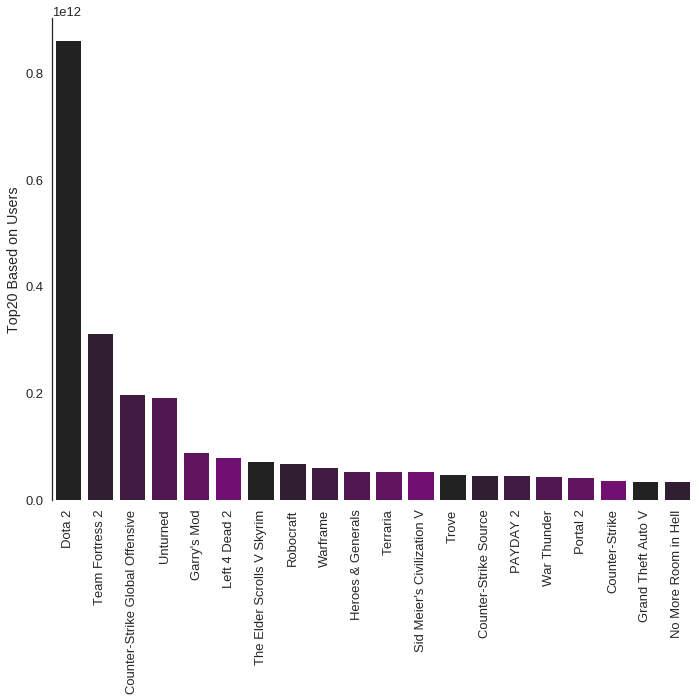

In [7]:
sns.set(style="white", context="talk")
fig2, ax2 = plt.subplots(figsize=(10, 10), sharex=True)  # Set up the matplotlib figure
x2 = np.array(list(Top20_Users['Game']))
y2 = np.array(list(Top20_Users['Users']))
sns.barplot(x2, y2, palette=sns.dark_palette("purple"), ax=ax2)
ax2.set_ylabel("Top20 Based on Users")
plt.xticks(rotation=90)
sns.despine(bottom=True)
plt.tight_layout(h_pad=5)

Adding Category to the Games:
-----------------------------

*Adding the columns for Genre and Game-play Mode. These are manually created columns with the help of google search. In case of any discrepancy, kindly suggest in the comments so that I can make the changes.*

In [13]:
Top20_hours['Genre'] = ['Strategy','Action','Action','Action','Strategy','Action','Action','Sandbox','Action','Action','Simulation','Simulation','Simulation','Action','Action','Simulation','Action','Action','Action','Strategy']
Top20_hours['Mode'] = ['Multiplayer','Multiplayer','Both','Multiplayer','Both','Multiplayer','Single Player','Single Player','Multiplayer','Both','Both','Both','Both','Both','Both','Both','Both','Both','Both','Both']

*Making Pie Charts to understand Categorization:*

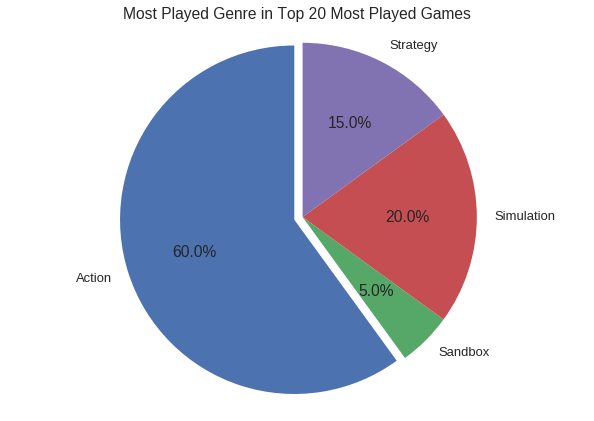

In [27]:
labels1 = ['Action','Sandbox','Simulation','Strategy']
values1 = [sum(Top20_hours['Genre'] == 'Action') , sum(Top20_hours['Genre'] == 'Sandbox') , sum(Top20_hours['Genre'] == 'Simulation') , sum(Top20_hours['Genre'] == 'Strategy')]
explode = (0.05, 0, 0, 0)
fig3, ax3 = plt.subplots()

ax3.pie(values1, explode=explode, labels=labels1, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3.axis('equal')
plt.title('Most Played Genre in Top 20 Most Played Games')
plt.show()

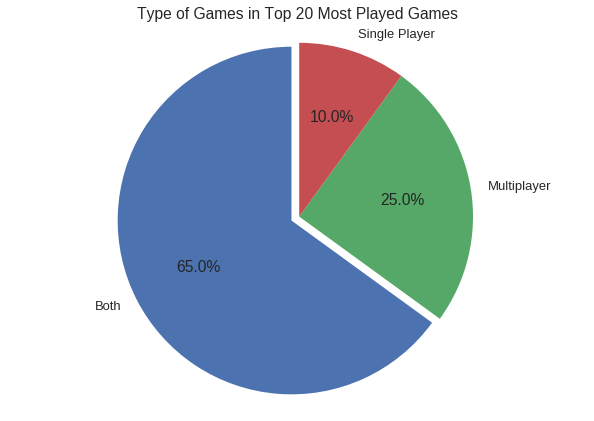

In [36]:
labels2 = ['Both','Multiplayer','Single Player']
values2 = [sum(Top20_hours['Mode'] == 'Both') , sum(Top20_hours['Mode'] == 'Multiplayer') , sum(Top20_hours['Mode'] == 'Single Player')]
explode = (0.05, 0, 0)
fig4, ax4 = plt.subplots()

ax4.pie(values2, explode=explode, labels=labels2, autopct='%1.1f%%',
        shadow=False, startangle=90)

ax4.axis('equal')
plt.title('Type of Games in Top 20 Most Played Games')
plt.show()